In [1]:
# to read the csv file we are mounying the google drive
# https://www.geeksforgeeks.org/ways-to-import-csv-files-in-google-colab/

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler,MinMaxScaler,PowerTransformer
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import TimeSeriesSplit
import sklearn.metrics as metrics
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from tqdm import tqdm
from sklearn.linear_model import SGDRegressor,PassiveAggressiveRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings("ignore")

In [3]:
final_df = pd.read_csv('/content/drive/MyDrive/Self-case Study/revised_final_data_df.csv', index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Self-case Study/revised_final_data_df.csv'

In [8]:
final_df

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Asian Paints_close_price,Asian Paints_trade_qty,Asian Paints_Turnover,...,EMA20,EMA200,ADX,macd,macdsig,RSI,BB_upper,BB_mid,BB_lower,next_day_close
0,2005-01-03,2080.00,2118.60,2080.00,2115.00,70506865.0,2375.10,319.10,17273,0.552009,...,2034.300202,1764.815581,52.459247,43.080271,42.192244,78.071485,2109.103066,2033.4650,1957.826934,2103.75
1,2005-01-04,2116.95,2120.15,2100.55,2103.75,72718302.0,2416.13,324.05,32240,1.041647,...,2040.914468,1768.188063,53.349588,43.440560,42.441907,73.511082,2118.096165,2039.0175,1959.938835,2032.20
2,2005-01-05,2103.75,2105.10,1990.15,2032.20,109223487.0,3622.02,321.85,30500,0.985153,...,2040.084519,1770.815048,50.160769,37.520097,41.457545,52.504719,2115.807341,2041.7300,1967.652659,1998.35
3,2005-01-06,2031.55,2035.65,1984.25,1998.35,94321939.0,3233.82,309.45,38985,1.208025,...,2036.109803,1773.079077,47.363079,29.753693,39.116775,45.832030,2115.135464,2042.1500,1969.164536,2015.50
4,2005-01-07,1998.25,2021.45,1992.55,2015.50,76285818.0,2764.03,320.05,17621,0.557419,...,2034.146964,1775.491225,44.765225,24.697922,36.233004,49.344550,2110.634773,2044.4750,1978.315227,1982.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4388,2022-09-12,17890.85,17980.55,17889.15,17936.35,265111179.5,20801.57,3432.20,641280,220.423950,...,17599.674469,16800.588929,26.411316,188.519124,203.078897,65.007357,18012.606410,17680.2900,17347.973590,18070.05
4389,2022-09-13,18044.45,18088.30,18015.45,18070.05,259922741.0,21039.08,3422.20,776044,266.818753,...,17644.472138,16813.220382,27.074345,204.124796,203.288077,67.928331,18072.207751,17698.8850,17325.562249,18003.75
4390,2022-09-14,17771.15,18091.55,17771.15,18003.75,365866933.0,26611.96,3438.95,816678,280.611771,...,17678.689077,16825.066448,26.232513,208.736364,204.377734,65.029466,18100.806393,17707.8100,17314.813607,17877.40
4391,2022-09-15,18046.35,18096.15,17861.50,17877.40,289637528.0,22007.78,3395.40,590182,201.091385,...,17697.613927,16835.537429,25.469206,199.891452,203.480478,59.792608,18090.437517,17704.4675,17318.497483,17530.85


As we can see that there are 70 features outof which we will select top 10 or top 15 important features.
we will select important features by giving our data to random forest model.

### Data Scaling 

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

X = final_df.drop(['Date','next_day_close'],axis=1)

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler
# code snippet taken from https://github.com/rohansawant7978/bitcoin-price-forecasting/blob/main/04_Feature_Selection.ipynb

scaler = RobustScaler()
X_scaled = X.copy()
X_scaled[X.columns] = scaler.fit_transform(X[X.columns])

scaler = MinMaxScaler()
X_scaled[X.columns] =  scaler.fit_transform(X_scaled[X.columns])
X_scaled

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Asian Paints_close_price,Asian Paints_trade_qty,Asian Paints_Turnover,Bharti Airtel_close_price,...,EMA10,EMA20,EMA200,ADX,macd,macdsig,RSI,BB_upper,BB_mid,BB_lower
0,0.010593,0.011572,0.011214,0.012821,0.037450,0.028837,0.001968,0.001494,0.000188,0.034796,...,0.007820,0.004403,0.000000,0.808875,0.732419,0.722195,0.878661,0.006007,0.005044,0.006581
1,0.012806,0.011664,0.012456,0.012142,0.038672,0.029361,0.002977,0.002790,0.000356,0.032430,...,0.008247,0.004815,0.000223,0.825362,0.732671,0.722398,0.817038,0.006549,0.005388,0.006714
2,0.012016,0.010762,0.005785,0.007825,0.058854,0.044740,0.002529,0.002639,0.000337,0.015489,...,0.007796,0.004763,0.000397,0.766314,0.728528,0.721597,0.533186,0.006411,0.005556,0.007201
3,0.007692,0.006598,0.005429,0.005783,0.050616,0.039789,0.000000,0.003374,0.000413,0.016403,...,0.007047,0.004515,0.000547,0.714509,0.723094,0.719694,0.443020,0.006371,0.005582,0.007296
4,0.005698,0.005747,0.005930,0.006818,0.040644,0.033798,0.002162,0.001524,0.000190,0.015274,...,0.006626,0.004393,0.000707,0.666404,0.719556,0.717349,0.490484,0.006099,0.005727,0.007873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4388,0.957393,0.962593,0.966398,0.967378,0.145037,0.263842,0.636822,0.055540,0.075542,0.616543,...,0.972191,0.973242,0.995601,0.326542,0.834189,0.853003,0.702130,0.965048,0.974685,0.977220
4389,0.966591,0.969054,0.974029,0.975444,0.142169,0.266871,0.634782,0.067212,0.091442,0.632785,...,0.976095,0.976031,0.996437,0.338819,0.845109,0.853173,0.741600,0.968642,0.975837,0.975806
4390,0.950225,0.969248,0.959268,0.971444,0.200741,0.337946,0.638198,0.070731,0.096169,0.631817,...,0.978547,0.978160,0.997222,0.323231,0.848335,0.854059,0.702429,0.970367,0.976390,0.975129
4391,0.966705,0.969524,0.964727,0.963821,0.158597,0.279226,0.629317,0.051114,0.068916,0.633699,...,0.979138,0.979338,0.997915,0.309097,0.842146,0.853330,0.631665,0.969742,0.976183,0.975361


In [12]:
# applying randomforest model to data.
# code snippet taken from https://github.com/rohansawant7978/bitcoin-price-forecasting/blob/main/04_Feature_Selection.ipynb
from sklearn.ensemble import RandomForestRegressor

y = final_df['next_day_close']
rfreg = RandomForestRegressor(n_estimators=100,n_jobs=-1,bootstrap=True,
                           verbose=5,random_state=1)
rfreg.fit(X_scaled,y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100


[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.9s


building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58

[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    9.0s


building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100building tree 88 of 100

building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.2s finished


RandomForestRegressor(n_jobs=-1, random_state=1, verbose=5)

In [15]:
imp_feat_df = pd.DataFrame(data = {"Feature Name": X_scaled.columns,"Feature Importance":rfreg.feature_importances_})

In [16]:
imp_feat_df

,Feature Name,Feature Importance
0,Open,0.010784
1,High,0.032389
2,Low,0.065516
3,Close,0.693871
4,Shares Traded,0.000007
...,...,...
63,macdsig,0.000012
64,RSI,0.000011
65,BB_upper,0.010091
66,BB_mid,0.002510


In [18]:
# https://stackoverflow.com/questions/37787698/how-to-sort-pandas-dataframe-from-one-column

imp_feat_sorted_df = imp_feat_df.sort_values(by=['Feature Importance'], ascending=False)

In [19]:
imp_feat_sorted_df

,Feature Name,Feature Importance
3,Close,0.693871
54,Total Returns Index,0.087541
2,Low,0.065516
1,High,0.032389
60,EMA200,0.030138
...,...,...
31,L&T_trade_qty,0.000006
11,Bharti Airtel_Turnover,0.000006
14,HDFC_Turnover,0.000006
13,HDFC_trade_qty,0.000005


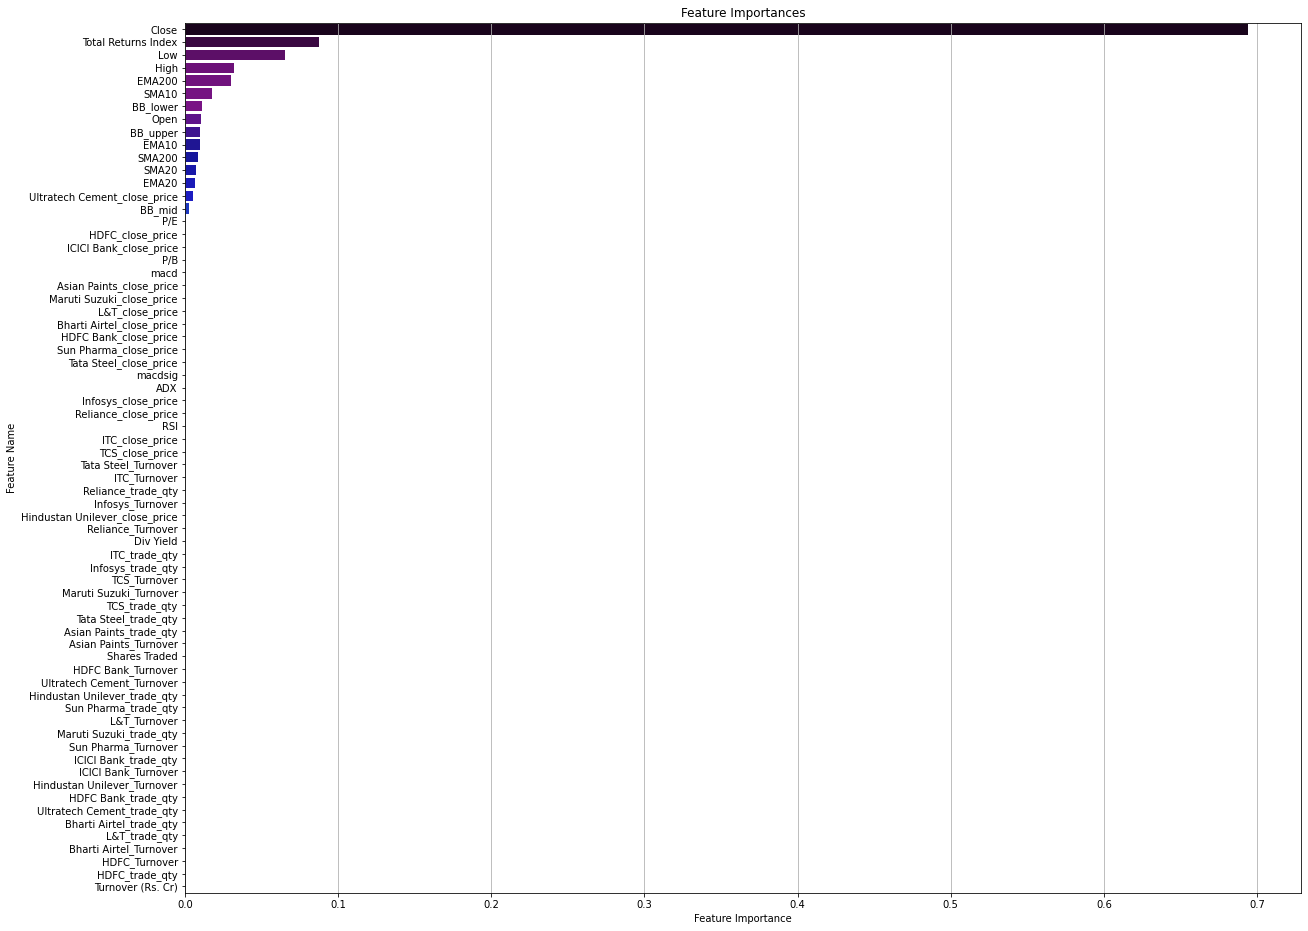

In [23]:
# code snipet taken from https://github.com/rohansawant7978/bitcoin-price-forecasting/blob/main/04_Feature_Selection.ipynb

import seaborn as sns
import matplotlib as mpl

fig,ax = plt.subplots(figsize=(20,16))
ax = sns.barplot(x = "Feature Importance",y = "Feature Name",
                    data=imp_feat_sorted_df,palette="nipy_spectral")
plt.title('Feature Importances')

cmap = plt.get_cmap('nipy_spectral_r',len(imp_feat_sorted_df['Feature Importance'].values))
minfi = min(imp_feat_sorted_df['Feature Importance'])
maxfi = max(imp_feat_sorted_df['Feature Importance'])
#https://stackoverflow.com/a/43807666
norm = mpl.colors.Normalize(vmin=minfi,vmax=maxfi)
sm = plt.cm.ScalarMappable(cmap=cmap,norm=norm)
sm.set_array([])
# plt.colorbar(sm,ticks=np.linspace(minfi,maxfi,n_select_features),
# boundaries=np.arange(minfi,maxfi+0.001,.0001))

ax.xaxis.grid()
plt.show()

In [2]:
# from above we are taking top 10 features.
# as we have seen that, there is no meaning of taking feature of individual stocks.
# So, we will frame one dataframe with above top 10 features.

top_feature_data_df = final_df[['Date','Close','Total Returns Index','Low','High','EMA200','SMA10','BB_lower','Open','BB_upper','EMA10','next_day_close']]
top_feature_data_df

NameError: name 'final_df' is not defined

In [27]:
# we will save this dataframe in csv format

top_feature_data_df.to_csv('/content/drive/MyDrive/Self-case Study/top_feature_data.csv')

In [4]:
# read saved csv file.
import pandas as pd

top_feature_data_df = pd.read_csv('top_feature_data.csv', index_col=0)
top_feature_data_df

,Date,Close,Total Returns Index,Low,High,EMA200,SMA10,BB_lower,Open,BB_upper,EMA10,next_day_close
0,2005-01-03,2115.00,2458.99,2080.00,2118.60,1764.815581,2064.670,1957.826934,2080.00,2109.103066,2065.611290,2103.75
1,2005-01-04,2103.75,2445.91,2100.55,2120.15,1768.188063,2070.580,1959.938835,2116.95,2118.096165,2072.545601,2032.20
2,2005-01-05,2032.20,2362.72,1990.15,2105.10,1770.815048,2070.265,1967.652659,2103.75,2115.807341,2065.210037,1998.35
3,2005-01-06,1998.35,2323.37,1984.25,2035.65,1773.079077,2065.585,1969.164536,2031.55,2115.135464,2053.053667,2015.50
4,2005-01-07,2015.50,2343.31,1992.55,2021.45,1775.491225,2060.865,1978.315227,1998.25,2110.634773,2046.225727,1982.00
...,...,...,...,...,...,...,...,...,...,...,...,...
4388,2022-09-12,17936.35,26043.69,17889.15,17980.55,16800.588929,17666.870,17347.973590,17890.85,18012.606410,17721.423132,18070.05
4389,2022-09-13,18070.05,26237.81,18015.45,18088.30,16813.220382,17742.585,17325.562249,18044.45,18072.207751,17784.809836,18003.75
4390,2022-09-14,18003.75,26141.52,17771.15,18091.55,16825.066448,17767.030,17314.813607,17771.15,18100.806393,17824.617138,17877.40
4391,2022-09-15,17877.40,25958.06,17861.50,18096.15,16835.537429,17800.490,17318.497483,18046.35,18090.437517,17834.214022,17530.85


### Train test Split

In [5]:
# As we know that, we can not devide time series data randomly.
# we will devide data as temporically.
# we will take last 250 rows for test.

X = top_feature_data_df.drop(['Date','next_day_close'], axis =1)
y = top_feature_data_df['next_day_close'].values

X_train = X.iloc[:4142]
X_test = X.iloc[4143:] # for test data we are taking last 250 rows 

y_train = y[:4142]
y_test = y[4143:]

In [4]:
# normalize the data.
# https://www.digitalocean.com/community/tutorials/normalize-data-in-python
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
scalar.fit(X_train)
names = X_train.columns

def normalise_data(data):
    d = scalar.transform(data)
    scaled_df = pd.DataFrame(d, columns=names)
    return scaled_df

In [17]:
# function for prediction and ploting the results
# code snippet taken from https://github.com/rohansawant7978/bitcoin-price-forecasting/blob/main/05_Modelling_Next_Day_Price.ipynb

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def calculate_metrics(y, ypred):
    MAE = metrics.mean_absolute_error(y, ypred)
    RMSE = metrics.mean_squared_error(y, ypred,squared=False)
    return MAE,RMSE

def plot_results(y,ypred,yt,yt_pred):
    y_act_total = np.concatenate((y, yt), axis=0)
    y_pred_total= np.concatenate((ypred, yt_pred), axis=0)
    plt.figure(figsize=(25,5))
    plt.plot(y_act_total,label='actual')
    plt.plot(y_pred_total,label='predicted')
    plt.title('actual Vs prediction of train and test data')
    plt.legend()
    plt.grid()
    plt.show()

In [6]:
def plt_results(y,ypred,title=None):
    plt.figure(figsize=(25,5))
    plt.plot(y,label='actual')
    plt.plot(ypred,label='predicted')
    plt.legend()
    plt.grid()
    plt.title(title)
    plt.show()

In [7]:
def matric_print(y,ypred,yt,yt_pred):
    print('MAPE of train data is ', mean_absolute_percentage_error(y, ypred))
    print('MAPE of test data is ', mean_absolute_percentage_error(yt,yt_pred))
    
    MAE_train, RMSE_train = calculate_metrics(y, ypred)
    MAE_test, RMSE_test = calculate_metrics(yt, yt_pred)
    print('MAE and RMSE of train is {} and {}'.format(MAE_train, RMSE_train))
    print('MAE and RMSE of test is {} and {}'.format(MAE_test, RMSE_test))

In [8]:
X_train_scaled = normalise_data(X_train)
X_test_scaled = normalise_data(X_test)

<AxesSubplot:ylabel='Count'>

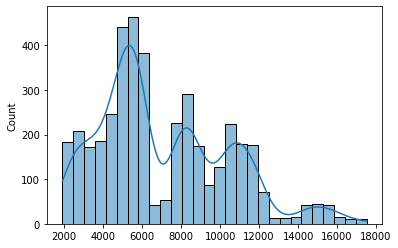

In [47]:
# check the distribution of target variable

import seaborn as sns
sns.histplot(y_train, kde=True)

As we can see in above plot that, target variable has right skewed distribution. therefore we will apply log before applying it to model

<AxesSubplot:ylabel='Count'>

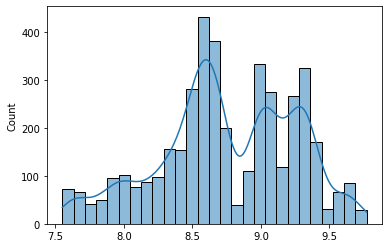

In [48]:
sns.histplot(np.log(y_train), kde=True)

As we have seen in above plot that after doing log transformation of target variable, it gives a approximately normal distribution. So, we will do log transformation before applying data to model.

In [9]:
# transform target variable into log form.
y_train_log = np.log(y_train)

### Baseline Model

In [58]:
# applying dummy regressor to our data

dmy_reg = DummyRegressor(strategy="quantile",quantile=0.9)
dmy_reg.fit(X_train_scaled, y_train_log)

ytrain_pred = dmy_reg.predict(X_train_scaled)
ytest_pred = dmy_reg.predict(X_test_scaled)

In [62]:
# as we know that we have converted target variable into logirithmic form. So model will also give prediction into logirithmic form.

ytrain_pred = np.exp(ytrain_pred)
ytest_pred = np.exp(ytest_pred)

In [63]:
matric_print(y_train,ytrain_pred,y_test,ytest_pred)

MAPE of train data is  110.19019319863483
MAPE of test data is  32.643761659610234
MAE and RMSE of train is 4846.665811987834 and 5553.439411460249
MAE and RMSE of test is 5621.416095635988 and 5669.54947116121


As we can see above that this prediction is based on dummy model. so for furthure model we should get better result than above model

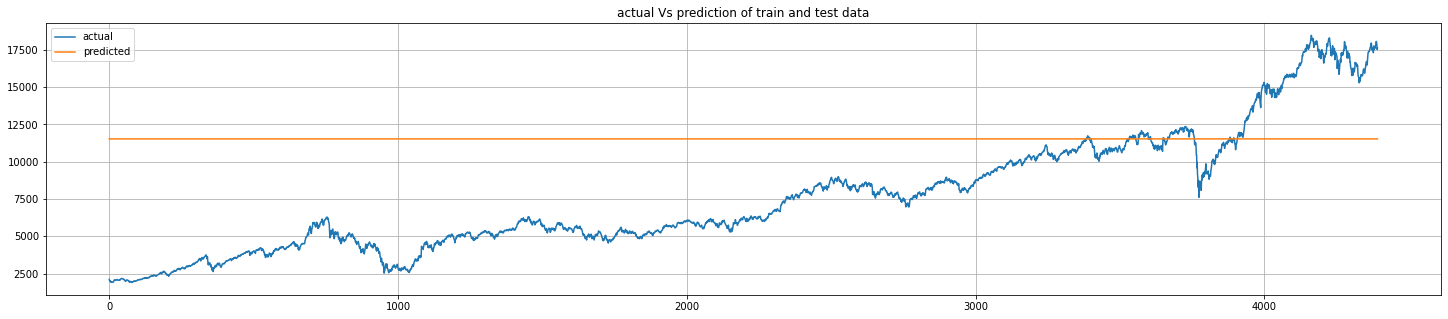

In [66]:
# lets plot the prediction of baseline model.
plot_results(y_train,ytrain_pred,y_test,ytest_pred)

### Applying Other models

### 1. SVR

#### Hyperparameter tunning

Since our data is timeseries data. We can not apply GridsearchCV or RandomsearchCV because it does not divide train test in temporal manner. So we will devide data temprically (Which we had already done above) and manually apply all parameter and selecting the best model with best parameter.

In [69]:
regularizer = [10, 100, 1000, 10000, 100000]

MAPE_train_svr = []
MAPE_test_svr = []
MAE_train_svr = []
MAE_test_svr = []
RMSE_train_svr = []
RMSE_test_svr = []

for i in regularizer:
    svr_reg = SVR(C=i,gamma='auto',kernel='rbf')
    svr_reg = svr_reg.fit(X_train_scaled, y_train_log)
    
    ytr_pred_svr = svr_reg.predict(X_train_scaled)
    ytr_pred_svr = np.exp(ytr_pred_svr) # since we have converted into log therfore applying exponantial 
    yte_pred_svr = svr_reg.predict(X_test_scaled)
    yte_pred_svr = np.exp(yte_pred_svr)
    
    MAPE_train_svr.append(mean_absolute_percentage_error(y_train, ytr_pred_svr))
    MAPE_test_svr.append(mean_absolute_percentage_error(y_test, yte_pred_svr))
    
    MAE_train_svr.append(calculate_metrics(y_train, ytr_pred_svr)[0])
    MAE_test_svr.append(calculate_metrics(y_test, yte_pred_svr)[0])
    
    RMSE_train_svr.append(calculate_metrics(y_train, ytr_pred_svr)[1])
    RMSE_test_svr.append(calculate_metrics(y_test, yte_pred_svr)[1])

In [55]:
result_svr_df = pd.DataFrame(columns=['param_C','MAPE_train','MAPE_test','MAE_train','MAE_test','RMSE_train','RMSE_test'])
result_svr_df['param_C'] = regularizer
result_svr_df['MAPE_train'] = MAPE_train_svr
result_svr_df['MAPE_test'] = MAPE_test_svr
result_svr_df['MAE_train'] = MAE_train_svr
result_svr_df['MAE_test'] = MAE_test_svr
result_svr_df['RMSE_train'] = RMSE_train_svr
result_svr_df['RMSE_test'] = RMSE_test_svr

result_svr_df.sort_values('RMSE_test', axis=0, ascending=True, inplace=True)
result_svr_df

,param_C,MAPE_train,MAPE_test,MAE_train,MAE_test,RMSE_train,RMSE_test
1,100,3.048953,9.217401,221.993831,1580.170116,322.062585,1591.636396
0,10,4.598572,12.482939,343.972304,2141.002976,438.777200,2155.749345
2,1000,3.257361,13.283883,241.539194,2291.227101,323.858751,2380.970281
4,100000,4.082621,17.281169,293.231159,2947.559044,383.342632,2996.078335
3,10000,4.052887,17.908421,290.529018,3055.000315,380.485082,3104.124751


#### Applying best parameter to model and plot the actual Vs pred test data

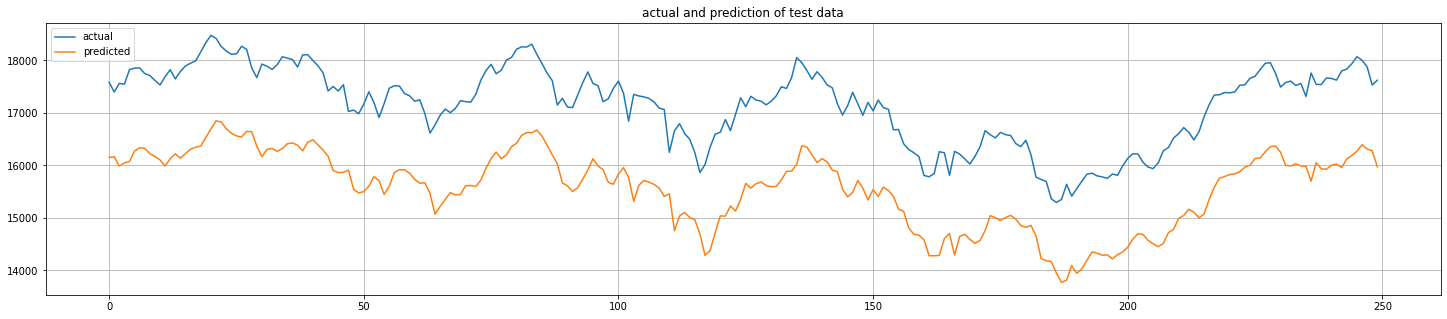

In [57]:
# from above table we are selecting best parameter. i.e. C=100 (test RMSE is low)
C = 100

svr = SVR(C=C,gamma='auto',kernel='rbf')
svr = svr.fit(X_train_scaled, y_train_log)

ytr_pred = svr.predict(X_train_scaled)
ytr_pred = np.exp(ytr_pred)  
yte_pred = svr.predict(X_test_scaled)
yte_pred = np.exp(yte_pred)

plt_results(y_test,yte_pred,title='actual and prediction of test data')

As per asbove test data plot it is cleare that we are getting overfitting model though we have done hyperparameter tunning but model is predicting good trend on data.

### Xgboost regressor

#### Hyperparameter Tunning

In [70]:
# https://stackoverflow.com/questions/69786993/tuning-xgboost-hyperparameters-with-randomizedsearchcv

max_depth = [1, 3, 5]
n_estimator = [100,200,300,400,500]
learning_rate = [0.001,0.01,0.1]

param_depth = []
param_estimator = []
param_lrRate = []
MAPE_train_xgb = []
MAPE_test_xgb = []
MAE_train_xgb = []
MAE_test_xgb = []
RMSE_train_xgb = []
RMSE_test_xgb = []

for i in max_depth:
    for j in n_estimator:
        for k in learning_rate:
            
            param_depth.append(i)
            param_estimator.append(j)
            param_lrRate.append(k)
            
            xgb_reg = xgb.XGBRegressor(n_estimators=j,max_depth=i,objective='reg:squarederror',
                                learning_rate =k,n_jobs=-1)
            xgb_reg = xgb_reg.fit(X_train_scaled, y_train_log)
            
            ytr_pred_xgb = xgb_reg.predict(X_train_scaled)
            ytr_pred_xgb = np.exp(ytr_pred_xgb) # since we have converted into log therfore applying exponantial 
            yte_pred_xgb = xgb_reg.predict(X_test_scaled)
            yte_pred_xgb = np.exp(yte_pred_xgb)
            
            MAPE_train_xgb.append(mean_absolute_percentage_error(y_train, ytr_pred_xgb))
            MAPE_test_xgb.append(mean_absolute_percentage_error(y_test, yte_pred_xgb))
    
            MAE_train_xgb.append(calculate_metrics(y_train, ytr_pred_xgb)[0])
            MAE_test_xgb.append(calculate_metrics(y_test, yte_pred_xgb)[0])
    
            RMSE_train_xgb.append(calculate_metrics(y_train, ytr_pred_xgb)[1])
            RMSE_test_xgb.append(calculate_metrics(y_test, yte_pred_xgb)[1])

In [71]:
result_xgb_df = pd.DataFrame(columns=['param_depth','param_estimator','param_lrRate','MAPE_train','MAPE_test','MAE_train','MAE_test','RMSE_train','RMSE_test'])
result_xgb_df['param_depth'] = param_depth
result_xgb_df['param_estimator'] = param_estimator
result_xgb_df['param_lrRate'] = param_lrRate
result_xgb_df['MAPE_train'] = MAPE_train_xgb
result_xgb_df['MAPE_test'] = MAPE_test_xgb
result_xgb_df['MAE_train'] = MAE_train_xgb
result_xgb_df['MAE_test'] = MAE_test_xgb
result_xgb_df['RMSE_train'] = RMSE_train_xgb
result_xgb_df['RMSE_test'] = RMSE_test_xgb

result_xgb_df.sort_values('RMSE_test', axis=0, ascending=True, inplace=True)
result_xgb_df

,param_depth,param_estimator,param_lrRate,MAPE_train,MAPE_test,MAE_train,MAE_test,RMSE_train,RMSE_test
44,5,500,0.100,0.460740,1.698561,30.810291,290.942058,42.704002,370.149551
41,5,400,0.100,0.524457,1.727935,34.869085,296.271898,48.145626,375.944273
38,5,300,0.100,0.603430,1.766418,40.014955,303.385326,55.078901,384.305281
29,3,500,0.100,0.714295,1.783472,47.225150,306.700005,64.972389,388.619517
26,3,400,0.100,0.762646,1.807682,50.184034,311.130352,68.929068,393.793205
35,5,200,0.100,0.718098,1.832940,47.121271,315.475631,64.526128,398.518248
23,3,300,0.100,0.815812,1.839868,52.849783,316.947456,72.104226,400.447684
20,3,200,0.100,0.886466,1.901520,57.259405,328.019859,78.384390,413.096713
32,5,100,0.100,0.884704,1.960477,56.122664,338.776702,75.701079,425.668761
17,3,100,0.100,0.967222,2.020307,61.322274,349.695277,83.667589,439.334573


#### Applying best parameter to model and plot the actual Vs pred test data

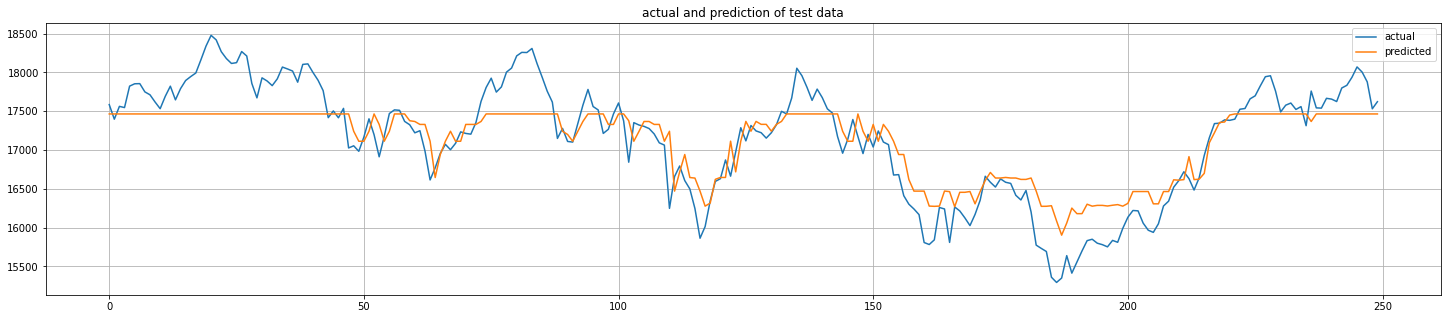

In [73]:
# from above table we are selecting best parameter. i.e. max_depth=5, n_estimator=500, learning_rate=0.1 (test RMSE is low)

n_estimators=500
max_depth=5
learning_rate=0.1

xgb = xgb.XGBRegressor(n_estimators=n_estimators,max_depth=max_depth,objective='reg:squarederror',
                                learning_rate=learning_rate,n_jobs=-1)
xgb = xgb.fit(X_train_scaled, y_train_log)

ytr_pred = xgb.predict(X_train_scaled)
ytr_pred = np.exp(ytr_pred)  
yte_pred = xgb.predict(X_test_scaled)
yte_pred = np.exp(yte_pred)

plt_results(y_test,yte_pred,title='actual and prediction of test data')

as per above test data plot, it is clear that model is slightly overfitting thogh we have done hyperparameter tunning also it is not good over poredicting the trend in the test data.

### SGDRegressor

#### Hyperparameter Tunning

In [74]:
alpha = [0.01, 0.001, 0.0001]
epsilon = [0.1, 0.01, 0.001]
eta0 = [0.1,0.01,0.001]

param_alpha = []
param_epsilon = []
param_eta0 = []
MAPE_train_sgd = []
MAPE_test_sgd = []
MAE_train_sgd = []
MAE_test_sgd = []
RMSE_train_sgd = []
RMSE_test_sgd = []

for i in alpha:
    for j in epsilon:
        for k in eta0:
            
            param_alpha.append(i)
            param_epsilon.append(j)
            param_eta0.append(k)
            
            sgd_reg = SGDRegressor(loss='squared_epsilon_insensitive',alpha=i,penalty='elasticnet',shuffle=True,
                           tol=0.000001,l1_ratio=0.15,epsilon=j,learning_rate='adaptive',max_iter=1000,eta0 =k)
            sgd_reg = sgd_reg.fit(X_train_scaled, y_train_log)
            
            ytr_pred_sgd = sgd_reg.predict(X_train_scaled)
            ytr_pred_sgd = np.exp(ytr_pred_sgd) # since we have converted into log therfore applying exponantial 
            yte_pred_sgd = sgd_reg.predict(X_test_scaled)
            yte_pred_sgd = np.exp(yte_pred_sgd)
            
            MAPE_train_sgd.append(mean_absolute_percentage_error(y_train, ytr_pred_sgd))
            MAPE_test_sgd.append(mean_absolute_percentage_error(y_test, yte_pred_sgd))
    
            MAE_train_sgd.append(calculate_metrics(y_train, ytr_pred_sgd)[0])
            MAE_test_sgd.append(calculate_metrics(y_test, yte_pred_sgd)[0])
    
            RMSE_train_sgd.append(calculate_metrics(y_train, ytr_pred_sgd)[1])
            RMSE_test_sgd.append(calculate_metrics(y_test, yte_pred_sgd)[1])

In [75]:
result_sgd_df = pd.DataFrame(columns=['param_alpha','param_epsilon','param_eta0','MAPE_train','MAPE_test','MAE_train','MAE_test','RMSE_train','RMSE_test'])
result_sgd_df['param_alpha'] = param_alpha
result_sgd_df['param_epsilon'] = param_epsilon
result_sgd_df['param_eta0'] = param_eta0
result_sgd_df['MAPE_train'] = MAPE_train_sgd
result_sgd_df['MAPE_test'] = MAPE_test_sgd
result_sgd_df['MAE_train'] = MAE_train_sgd
result_sgd_df['MAE_test'] = MAE_test_sgd
result_sgd_df['RMSE_train'] = RMSE_train_sgd
result_sgd_df['RMSE_test'] = RMSE_test_sgd

result_sgd_df.sort_values('RMSE_test', axis=0, ascending=True, inplace=True)
result_sgd_df

,param_alpha,param_epsilon,param_eta0,MAPE_train,MAPE_test,MAE_train,MAE_test,RMSE_train,RMSE_test
24,0.0001,0.001,0.100,6.783666,44.557353,450.279457,7650.182397,751.770240,7752.553561
21,0.0001,0.010,0.100,6.933664,45.310270,461.039739,7778.460665,765.756173,7878.254100
25,0.0001,0.001,0.010,7.179353,46.466411,473.757087,7977.019835,794.485490,8072.701545
22,0.0001,0.010,0.010,7.314711,47.185017,483.832315,8100.031171,807.912992,8193.259267
18,0.0001,0.100,0.100,9.579233,47.991929,630.871159,8238.754882,899.000391,8313.169359
1,0.0100,0.100,0.010,11.958358,47.960002,780.159182,8256.675629,1080.568214,8354.138677
0,0.0100,0.100,0.100,11.959857,48.137784,780.827452,8287.365420,1083.570042,8385.348466
2,0.0100,0.100,0.001,11.874677,48.677545,773.086225,8375.807844,1072.641498,8461.869636
19,0.0001,0.100,0.010,10.662770,53.330475,703.642913,9157.619813,1027.360028,9222.236960
11,0.0010,0.100,0.001,11.696008,55.402808,776.642398,9528.819224,1153.169388,9612.406482


#### Applying best parameter to model and plot the actual Vs pred test data

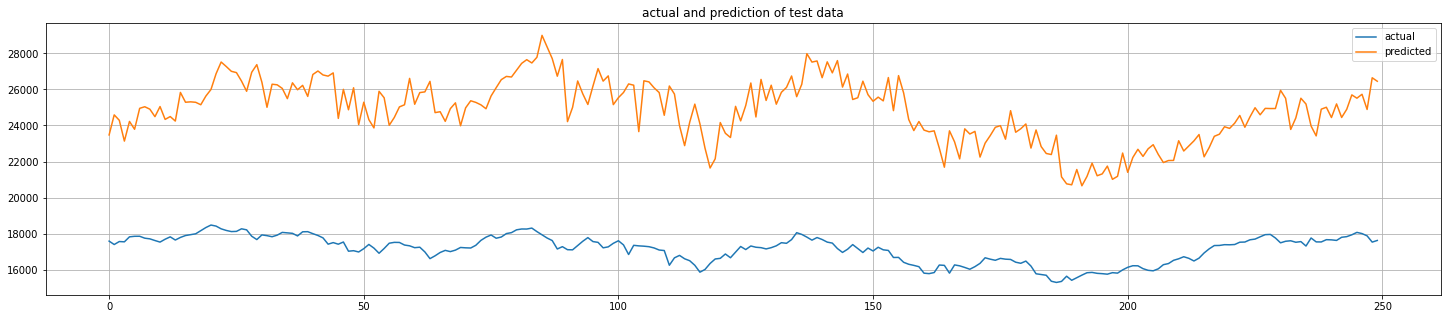

In [81]:
# from above table we are selecting best parameter. i.e. epsilon=0.001, alpha=0.0001, eta0=0.1 (test RMSE is low)

alpha=0.0001
epsilon=0.001
eta0=0.1

sgd = SGDRegressor(loss='squared_epsilon_insensitive',alpha=alpha,penalty='elasticnet',shuffle=True,
                           tol=0.000001,l1_ratio=0.15,epsilon=epsilon,learning_rate='adaptive',max_iter=1000,eta0 =eta0)
sgd = sgd.fit(X_train_scaled, y_train_log)

ytr_pred = sgd.predict(X_train_scaled)
ytr_pred = np.exp(ytr_pred)  
yte_pred = sgd.predict(X_test_scaled)
yte_pred = np.exp(yte_pred)

plt_results(y_test,yte_pred,title='actual and prediction of test data')

As we can see above that, sgd is giving bad result after doing hyperparameter tunning. Sgd is giving high variance in test data and also not good in predicting the trend

### LGBM Regressor

#### Hyperparameter Tunning

In [85]:
max_depth = [1, 3, 5]
n_estimator = [100,200,300,400,500]
learning_rate = [0.001,0.01,0.1]

param_depth = []
param_estimator = []
param_lrRate = []
MAPE_train_lgbm = []
MAPE_test_lgbm = []
MAE_train_lgbm = []
MAE_test_lgbm = []
RMSE_train_lgbm = []
RMSE_test_lgbm = []

for i in max_depth:
    for j in n_estimator:
        for k in learning_rate:
            
            param_depth.append(i)
            param_estimator.append(j)
            param_lrRate.append(k)
            
            lgbm_reg = LGBMRegressor(n_estimators=j,max_depth=i,learning_rate =k,n_jobs=-1)
            lgbm_reg = lgbm_reg.fit(X_train_scaled, y_train_log)
            
            ytr_pred_lgbm = lgbm_reg.predict(X_train_scaled)
            ytr_pred_lgbm = np.exp(ytr_pred_lgbm) # since we have converted into log therfore applying exponantial 
            yte_pred_lgbm = lgbm_reg.predict(X_test_scaled)
            yte_pred_lgbm = np.exp(yte_pred_lgbm)
            
            MAPE_train_lgbm.append(mean_absolute_percentage_error(y_train, ytr_pred_lgbm))
            MAPE_test_lgbm.append(mean_absolute_percentage_error(y_test, yte_pred_lgbm))
    
            MAE_train_lgbm.append(calculate_metrics(y_train, ytr_pred_lgbm)[0])
            MAE_test_lgbm.append(calculate_metrics(y_test, yte_pred_lgbm)[0])
    
            RMSE_train_lgbm.append(calculate_metrics(y_train, ytr_pred_lgbm)[1])
            RMSE_test_lgbm.append(calculate_metrics(y_test, yte_pred_lgbm)[1])

In [86]:
result_lgbm_df = pd.DataFrame(columns=['param_depth','param_estimator','param_lrRate','MAPE_train','MAPE_test','MAE_train','MAE_test','RMSE_train','RMSE_test'])
result_lgbm_df['param_depth'] = param_depth
result_lgbm_df['param_estimator'] = param_estimator
result_lgbm_df['param_lrRate'] = param_lrRate
result_lgbm_df['MAPE_train'] = MAPE_train_lgbm
result_lgbm_df['MAPE_test'] = MAPE_test_lgbm
result_lgbm_df['MAE_train'] = MAE_train_lgbm
result_lgbm_df['MAE_test'] = MAE_test_lgbm
result_lgbm_df['RMSE_train'] = RMSE_train_lgbm
result_lgbm_df['RMSE_test'] = RMSE_test_lgbm

result_lgbm_df.sort_values('RMSE_test', axis=0, ascending=True, inplace=True)
result_lgbm_df

,param_depth,param_estimator,param_lrRate,MAPE_train,MAPE_test,MAE_train,MAE_test,RMSE_train,RMSE_test
44,5,500,0.100,0.759377,2.957677,50.172549,512.988660,71.457860,614.750518
41,5,400,0.100,0.778543,2.981127,51.346182,517.102407,73.249587,618.487742
38,5,300,0.100,0.804367,3.013376,52.957786,522.788107,75.631620,623.783001
35,5,200,0.100,0.836682,3.062610,54.548335,531.530518,77.933843,632.375676
29,3,500,0.100,0.877662,3.085284,57.454053,535.145633,80.934742,635.176611
26,3,400,0.100,0.895868,3.100542,58.484557,537.788543,82.507030,637.606322
23,3,300,0.100,0.921409,3.124001,59.890376,541.949271,84.367795,641.570133
32,5,100,0.100,0.877700,3.185005,56.783828,553.458209,81.322094,654.716004
20,3,200,0.100,0.947474,3.221185,61.312231,559.325529,86.582530,658.954478
17,3,100,0.100,0.982611,3.321338,63.018531,577.306049,89.353358,677.702706


#### Applying best parameter to model and plot the actual Vs pred test data

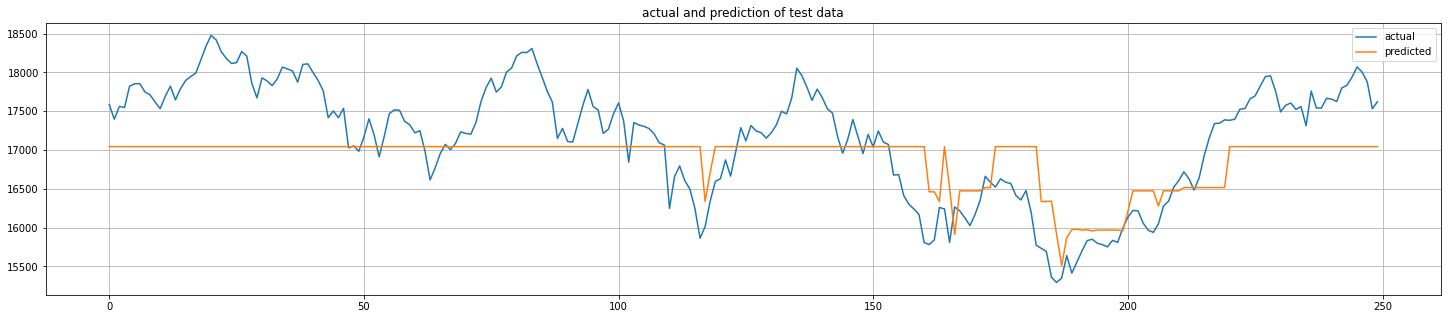

In [87]:
# from above table we are selecting best parameter. i.e. max_depth=5, n_estimator=500, learning_rate=0.1 (test RMSE is low)

n_estimators=500
max_depth=5
learning_rate=0.1

lgbm = LGBMRegressor(n_estimators=n_estimators,max_depth=max_depth,learning_rate =learning_rate,n_jobs=-1)
lgbm = lgbm.fit(X_train_scaled, y_train_log)

ytr_pred = lgbm.predict(X_train_scaled)
ytr_pred = np.exp(ytr_pred)  
yte_pred = lgbm.predict(X_test_scaled)
yte_pred = np.exp(yte_pred)

plt_results(y_test,yte_pred,title='actual and prediction of test data')

As we can see that LGBM regressor does not give good results. it is overfitting on test data. also it is not predicting the trend in the test data

### Random forest regressor

#### Hyperparameter tunning

In [88]:
n_estimators = [50,100,150,200,250,300,350,400,450,500]
max_depth = [5,10,15,20,25,30,35,40,45,50]

param_depth = []
param_estimator = []
MAPE_train_rf = []
MAPE_test_rf = []
MAE_train_rf = []
MAE_test_rf = []
RMSE_train_rf = []
RMSE_test_rf = []

for i in n_estimators:
    for j in max_depth:
        param_depth.append(j)
        param_estimator.append(i)
            
        rf_reg = RandomForestRegressor(n_estimators=i,max_depth=j)
        rf_reg = rf_reg.fit(X_train_scaled, y_train_log)
            
        ytr_pred_rf = rf_reg.predict(X_train_scaled)
        ytr_pred_rf = np.exp(ytr_pred_rf) # since we have converted into log therfore applying exponantial 
        yte_pred_rf = rf_reg.predict(X_test_scaled)
        yte_pred_rf = np.exp(yte_pred_rf)
            
        MAPE_train_rf.append(mean_absolute_percentage_error(y_train, ytr_pred_rf))
        MAPE_test_rf.append(mean_absolute_percentage_error(y_test, yte_pred_rf))
    
        MAE_train_rf.append(calculate_metrics(y_train, ytr_pred_rf)[0])
        MAE_test_rf.append(calculate_metrics(y_test, yte_pred_rf)[0])
    
        RMSE_train_rf.append(calculate_metrics(y_train, ytr_pred_rf)[1])
        RMSE_test_rf.append(calculate_metrics(y_test, yte_pred_rf)[1])   

In [89]:
result_rf_df = pd.DataFrame(columns=['param_depth','param_estimator','MAPE_train','MAPE_test','MAE_train','MAE_test','RMSE_train','RMSE_test'])
result_rf_df['param_depth'] = param_depth
result_rf_df['param_estimator'] = param_estimator
result_rf_df['MAPE_train'] = MAPE_train_rf
result_rf_df['MAPE_test'] = MAPE_test_rf
result_rf_df['MAE_train'] = MAE_train_rf
result_rf_df['MAE_test'] = MAE_test_rf
result_rf_df['RMSE_train'] = RMSE_train_rf
result_rf_df['RMSE_test'] = RMSE_test_rf

result_rf_df.sort_values('RMSE_test', axis=0, ascending=True, inplace=True)
result_rf_df

,param_depth,param_estimator,MAPE_train,MAPE_test,MAE_train,MAE_test,RMSE_train,RMSE_test
14,25,100,0.385299,1.761322,24.106728,301.645183,35.961235,381.001363
38,45,200,0.383762,1.785434,24.045589,305.893838,35.335176,385.820683
9,50,50,0.386146,1.806957,24.331480,309.607077,36.069922,386.635350
23,20,150,0.384057,1.798709,24.068546,307.971045,35.636282,387.297449
28,45,150,0.383235,1.805037,24.020325,308.887716,35.461670,387.331810
...,...,...,...,...,...,...,...,...
50,5,300,1.300889,3.338558,85.826275,582.440867,118.202473,692.406172
90,5,500,1.304137,3.335346,85.950432,582.102726,118.116162,693.221584
40,5,250,1.305100,3.354793,86.243885,584.842995,118.658476,693.547196
0,5,50,1.317715,3.357963,86.760876,585.600607,119.337748,695.337480


#### Applying best parameter to model and plot the actual Vs pred test data

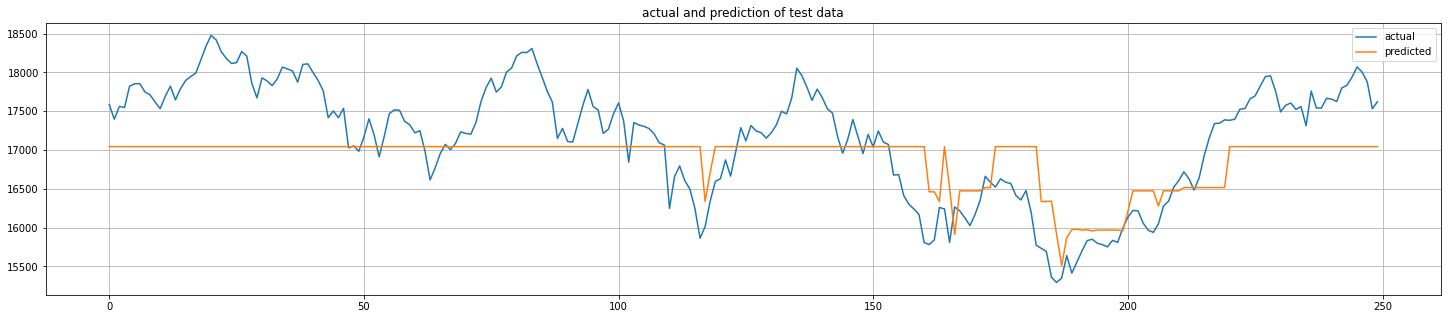

In [90]:
# from above table we are selecting best parameter. i.e. max_depth=25, n_estimator=500, learning_rate=0.1 (test RMSE is low)

n_estimators=100
max_depth=25

rf = RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth)
rf = rf.fit(X_train_scaled, y_train_log)

ytr_pred = lgbm.predict(X_train_scaled)
ytr_pred = np.exp(ytr_pred)  
yte_pred = lgbm.predict(X_test_scaled)
yte_pred = np.exp(yte_pred)

plt_results(y_test,yte_pred,title='actual and prediction of test data')

As we can see that randomforest regressor also give bad results. though we have done hyperparameter tunning, randomforest regressor gives overfitting result on test data. also model does not predict the trend

### Observsation from above all models

1) It seems that Random forest gave the best result.

2) but at the same time we are getting overfit result for each model. this is because of volatile nature of market. 

3) To overcome this problem, we will be splitting the data into multiple windows.

4) We will apply all the above models with the same hyperparameters we have selected above on splitted data with multiple windows splitting.

### Train Test Split (Multiple window split)

In [6]:
train_window = 1000
test_window = 200
train_splits = []
test_splits = []
y_train_splits = []
y_test_splits = []
for i in tqdm(range(train_window, len(top_feature_data_df),test_window)):
    train_split = X[i-train_window:i]
    test_split = X[i:i+test_window]
    y_train_split = y[i-train_window:i]
    y_test_split = y[i:i+test_window]
    train_splits.append(train_split)
    test_splits.append(test_split)
    y_train_splits.append(y_train_split)
    y_test_splits.append(y_test_split)

100%|████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 5682.43it/s]


### Data Scaling

In [92]:
# Normalising all splitted data and stored n a list

train_norm_split = []
test_norm_split = []

for i in range(0,len(train_splits)):
    
    scalar = MinMaxScaler()
    scalar.fit(train_splits[i])
    names = train_splits[i].columns
    
    train_norm_split.append(normalise_data(train_splits[i]))
    test_norm_split.append(normalise_data(test_splits[i]))  

## Applying model

### Dummy Regressor

In [134]:
yt_pred_dmy = []
MAPE_train_dmy = []
MAPE_test_dmy = []
MAE_train_dmy = []
MAE_test_dmy = []
RMSE_train_dmy = []
RMSE_test_dmy = []

for i in range(0,len(train_norm_split)):
    
    dmy_reg = DummyRegressor(strategy="quantile",quantile=0.9)
    dmy_reg = dmy_reg.fit(train_norm_split[i],y_train_splits[i])
    
    y_train_pred = dmy_reg.predict(train_norm_split[i])
    y_test_pred = dmy_reg.predict(test_norm_split[i])
    
    MAPE_train = mean_absolute_percentage_error(y_train_splits[i], y_train_pred)
    MAPE_test = mean_absolute_percentage_error(y_test_splits[i], y_test_pred)
    
    MAE_train, RMSE_train = calculate_metrics(y_train_splits[i], y_train_pred)
    MAE_test, RMSE_test = calculate_metrics(y_test_splits[i], y_test_pred)
    
    yt_pred_dmy.append(y_test_pred)
    MAPE_train_dmy.append(MAPE_train)
    MAPE_test_dmy.append(MAPE_test)
    MAE_train_dmy.append(MAE_train)
    MAE_test_dmy.append(MAE_test)
    RMSE_train_dmy.append(RMSE_train)
    RMSE_test_dmy.append(RMSE_test)
    
avg_MAPE_train_dmy = sum(MAPE_train_dmy)/len(MAPE_train_dmy)
avg_MAPE_test_dmy = sum(MAPE_test_dmy)/len(MAPE_test_dmy)
avg_MAE_train_dmy = sum(MAE_train_dmy)/len(MAE_train_dmy)
avg_MAE_test_dmy = sum(MAE_test_dmy)/len(MAE_test_dmy)
avg_RMSE_train_dmy = sum(RMSE_train_dmy)/len(RMSE_train_dmy)
avg_RMSE_test_dmy = sum(RMSE_test_dmy)/len(RMSE_test_dmy)

In [138]:
total_yt_actual = []
total_yt_pred_dmy = []

for i in range(0,len(y_test_splits)):
    total_yt_actual += list(y_test_splits[i])
    total_yt_pred_dmy += list(yt_pred_dmy[i])

MAPE of train is  26.042900811705305
MAPE of test is  11.12656259699971
MAE of train is  1499.4875647058823
MAE of test is  963.7171874885704
RSME of train is  1778.1783124142494
RSME of test is  1097.412316985844


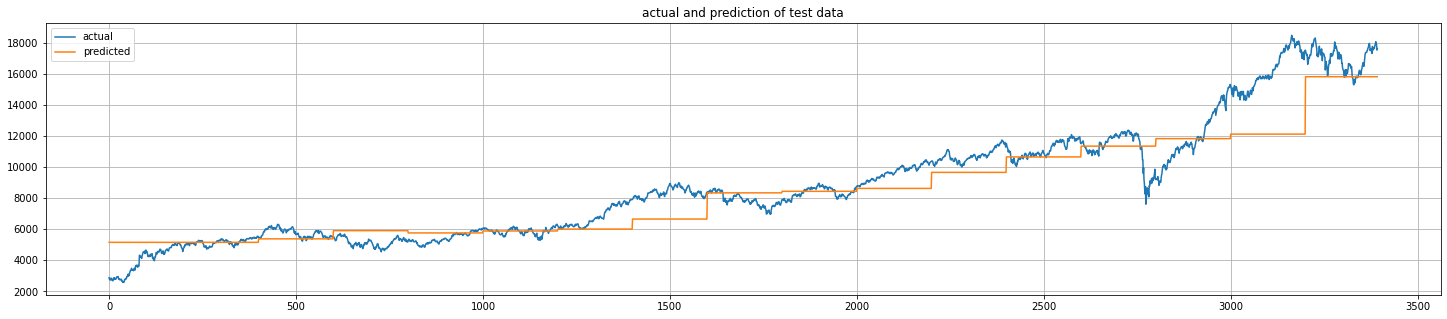

In [142]:
print('MAPE of train is ',avg_MAPE_train_dmy)
print('MAPE of test is ',avg_MAPE_test_dmy) 
print('MAE of train is ',avg_MAE_train_dmy)
print('MAE of test is ',avg_MAE_test_dmy)
print('RSME of train is ',avg_RMSE_train_dmy)
print('RSME of test is ',avg_RMSE_test_dmy)

plt_results(total_yt_actual, total_yt_pred_dmy, 'actual and prediction of test data')

### SVR (Support vector regressor with 'rbf' Kernel)

In [93]:
# from the above we will select the best parameters from hyperparameter tunning.
C = 100

yt_pred_svr = []
MAPE_train_svr = []
MAPE_test_svr = []
MAE_train_svr = []
MAE_test_svr = []
RMSE_train_svr = []
RMSE_test_svr = []

for i in range(0,len(train_norm_split)):
    
    svr_reg = SVR(C=100,gamma='auto',kernel='rbf')
    svr_reg = svr_reg.fit(train_norm_split[i],y_train_splits[i])
    
    y_train_pred = svr_reg.predict(train_norm_split[i])
    y_test_pred = svr_reg.predict(test_norm_split[i])
    
    MAPE_train = mean_absolute_percentage_error(y_train_splits[i], y_train_pred)
    MAPE_test = mean_absolute_percentage_error(y_test_splits[i], y_test_pred)
    
    MAE_train, RMSE_train = calculate_metrics(y_train_splits[i], y_train_pred)
    MAE_test, RMSE_test = calculate_metrics(y_test_splits[i], y_test_pred)
    
    yt_pred_svr.append(y_test_pred)
    MAPE_train_svr.append(MAPE_train)
    MAPE_test_svr.append(MAPE_test)
    MAE_train_svr.append(MAE_train)
    MAE_test_svr.append(MAE_test)
    RMSE_train_svr.append(RMSE_train)
    RMSE_test_svr.append(RMSE_test)
    
avg_MAPE_train_svr = sum(MAPE_train_svr)/len(MAPE_train_svr)
avg_MAPE_test_svr = sum(MAPE_test_svr)/len(MAPE_test_svr)
avg_MAE_train_svr = sum(MAE_train_svr)/len(MAE_train_svr)
avg_MAE_test_svr = sum(MAE_test_svr)/len(MAE_test_svr)
avg_RMSE_train_svr = sum(RMSE_train_svr)/len(RMSE_train_svr)
avg_RMSE_test_svr = sum(RMSE_test_svr)/len(RMSE_test_svr)

In [94]:
total_yt_pred_svr = []
total_yt_actual = []

for i in range(0,len(y_test_splits)):
    total_yt_actual += list(y_test_splits[i])
    total_yt_pred_svr += list(yt_pred_svr[i])

MAPE of train is  1.4067633813193936
MAPE of test is  3.5430792096219075
MAE of train is  89.37044095365582
MAE of test is  373.94623007425395
RSME of train is  125.39485696717826
RSME of test is  469.80163749677325


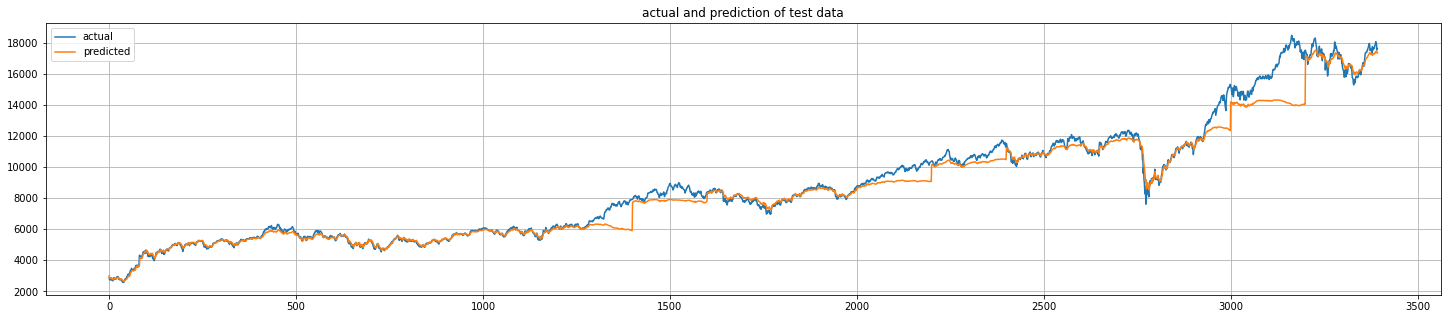

In [95]:
print('MAPE of train is ',avg_MAPE_train_svr)
print('MAPE of test is ',avg_MAPE_test_svr) 
print('MAE of train is ',avg_MAE_train_svr)
print('MAE of test is ',avg_MAE_test_svr)
print('RSME of train is ',avg_RMSE_train_svr)
print('RSME of test is ',avg_RMSE_test_svr)

plt_results(total_yt_actual, total_yt_pred_svr, 'actual and prediction of test data')

From the above plot, we have seen that splitting the data in multiple windows gives better performance than before. It reduces the overfitting but somewhere it does not follow good prediction.

### Xgboost

In [99]:
# from the above we will select the best parameters from hyperparameter tunning.
n_estimators = 500
max_depth = 5
learning_rate = 0.1

yt_pred_xgb = []
MAPE_train_xgb = []
MAPE_test_xgb = []
MAE_train_xgb = []
MAE_test_xgb = []
RMSE_train_xgb = []
RMSE_test_xgb = []

for i in range(0,len(train_norm_split)):
    
    xgb_reg = xgb.XGBRegressor(n_estimators=500,max_depth=5,objective='reg:squarederror',
                                learning_rate =0.1,n_jobs=-1)
    xgb_reg = xgb_reg.fit(train_norm_split[i],y_train_splits[i])
    
    y_train_pred = xgb_reg.predict(train_norm_split[i])
    y_test_pred = xgb_reg.predict(test_norm_split[i])
    
    MAPE_train = mean_absolute_percentage_error(y_train_splits[i], y_train_pred)
    MAPE_test = mean_absolute_percentage_error(y_test_splits[i], y_test_pred)
    
    MAE_train, RMSE_train = calculate_metrics(y_train_splits[i], y_train_pred)
    MAE_test, RMSE_test = calculate_metrics(y_test_splits[i], y_test_pred)
    
    yt_pred_xgb.append(y_test_pred)
    MAPE_train_xgb.append(MAPE_train)
    MAPE_test_xgb.append(MAPE_test)
    MAE_train_xgb.append(MAE_train)
    MAE_test_xgb.append(MAE_test)
    RMSE_train_xgb.append(RMSE_train)
    RMSE_test_xgb.append(RMSE_test)
    
avg_MAPE_train_xgb = sum(MAPE_train_xgb)/len(MAPE_train_xgb)
avg_MAPE_test_xgb = sum(MAPE_test_xgb)/len(MAPE_test_xgb)
avg_MAE_train_xgb = sum(MAE_train_xgb)/len(MAE_train_xgb)
avg_MAE_test_xgb = sum(MAE_test_xgb)/len(MAE_test_xgb)
avg_RMSE_train_xgb = sum(RMSE_train_xgb)/len(RMSE_train_xgb)
avg_RMSE_test_xgb = sum(RMSE_test_xgb)/len(RMSE_test_xgb)

In [100]:
total_yt_pred_xgb = []

for i in range(0,len(y_test_splits)):
    total_yt_pred_xgb += list(yt_pred_xgb[i])

MAPE of train is  0.12209912646741555
MAPE of test is  3.490860378212313
MAE of train is  7.591251798023897
MAE of test is  346.0141785454487
RSME of train is  10.18938954475378
RSME of test is  451.90605711603365


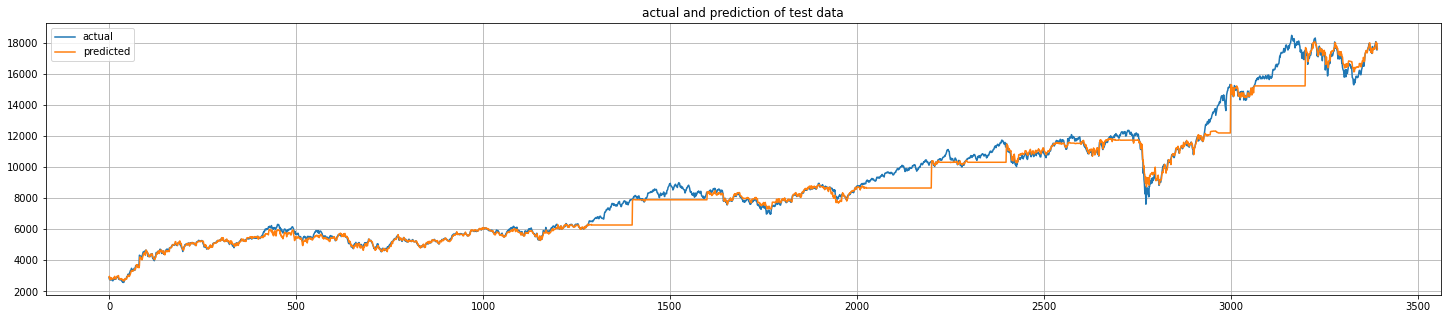

In [101]:
print('MAPE of train is ',avg_MAPE_train_xgb)
print('MAPE of test is ',avg_MAPE_test_xgb) 
print('MAE of train is ',avg_MAE_train_xgb)
print('MAE of test is ',avg_MAE_test_xgb)
print('RSME of train is ',avg_RMSE_train_xgb)
print('RSME of test is ',avg_RMSE_test_xgb)

plt_results(total_yt_actual, total_yt_pred_xgb, 'actual and prediction of test data')

As we can see in above plot that, it is giving slightly overfitting results. and somewhere it is not giving good prediction on trend. 

### Linear Regressor (SGDregressor)

In [102]:
# from the above we will select the best parameters from hyperparameter tunning.
alpha = 0.0001
epsilon = 0.01
eta0 = 0.1

yt_pred_sgd = []
MAPE_train_sgd = []
MAPE_test_sgd = []
MAE_train_sgd = []
MAE_test_sgd = []
RMSE_train_sgd = []
RMSE_test_sgd = []

for i in range(0,len(train_norm_split)):
    
    sgd_reg = SGDRegressor(loss='squared_epsilon_insensitive',alpha=0.0001,penalty='elasticnet',shuffle=True,
                           tol=0.000001,l1_ratio=0.15,epsilon=0.01,learning_rate='adaptive',max_iter=1000,eta0 =0.1)
    sgd_reg = sgd_reg.fit(train_norm_split[i],y_train_splits[i])
    
    y_train_pred = sgd_reg.predict(train_norm_split[i])
    y_test_pred = sgd_reg.predict(test_norm_split[i])
    
    MAPE_train = mean_absolute_percentage_error(y_train_splits[i], y_train_pred)
    MAPE_test = mean_absolute_percentage_error(y_test_splits[i], y_test_pred)
    
    MAE_train, RMSE_train = calculate_metrics(y_train_splits[i], y_train_pred)
    MAE_test, RMSE_test = calculate_metrics(y_test_splits[i], y_test_pred)
    
    yt_pred_sgd.append(y_test_pred)
    MAPE_train_sgd.append(MAPE_train)
    MAPE_test_sgd.append(MAPE_test)
    MAE_train_sgd.append(MAE_train)
    MAE_test_sgd.append(MAE_test)
    RMSE_train_sgd.append(RMSE_train)
    RMSE_test_sgd.append(RMSE_test)
    
avg_MAPE_train_sgd = sum(MAPE_train_sgd)/len(MAPE_train_sgd)
avg_MAPE_test_sgd = sum(MAPE_test_sgd)/len(MAPE_test_sgd)
avg_MAE_train_sgd = sum(MAE_train_sgd)/len(MAE_train_sgd)
avg_MAE_test_sgd = sum(MAE_test_sgd)/len(MAE_test_sgd)
avg_RMSE_train_sgd = sum(RMSE_train_sgd)/len(RMSE_train_sgd)
avg_RMSE_test_sgd = sum(RMSE_test_sgd)/len(RMSE_test_sgd)

In [103]:
total_yt_pred_sgd = []

for i in range(0,len(y_test_splits)):
    total_yt_pred_sgd += list(yt_pred_sgd[i])

MAPE of train is  0.968411199929782
MAPE of test is  0.8800313531895634
MAE of train is  60.180168120536564
MAE of test is  73.56523729522914
RSME of train is  82.9744515166173
RSME of test is  97.41556134876572


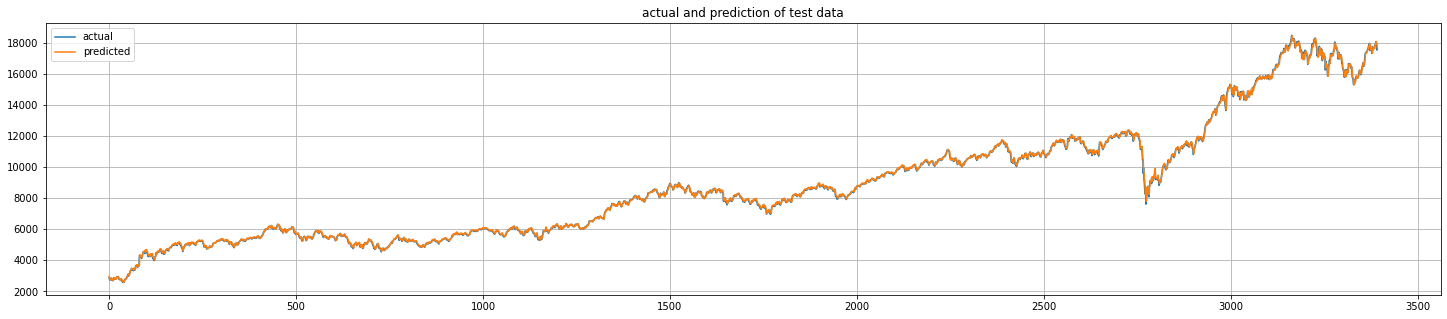

In [104]:
print('MAPE of train is ',avg_MAPE_train_sgd)
print('MAPE of test is ',avg_MAPE_test_sgd) 
print('MAE of train is ',avg_MAE_train_sgd)
print('MAE of test is ',avg_MAE_test_sgd)
print('RSME of train is ',avg_RMSE_train_sgd)
print('RSME of test is ',avg_RMSE_test_sgd)

plt_results(total_yt_actual, total_yt_pred_sgd, 'actual and prediction of test data')

As we can see in above plot that Sgdregressor give good result and also predicting good trend on test data.

### Light GBM Regressor

In [105]:
# from the above we will select the best parameters from hyperparameter tunning.
max_depth = 5
learning_rate = 0.1
n_estimators = 500

yt_pred_lgbm = []
MAPE_train_lgbm = []
MAPE_test_lgbm = []
MAE_train_lgbm = []
MAE_test_lgbm = []
RMSE_train_lgbm = []
RMSE_test_lgbm = []

for i in range(0,len(train_norm_split)):
    
    lgbm_reg = LGBMRegressor(max_depth=5, learning_rate=0.1, n_estimators=500, n_jobs=-1)
    lgbm_reg = lgbm_reg.fit(train_norm_split[i],y_train_splits[i])
    
    y_train_pred = lgbm_reg.predict(train_norm_split[i])
    y_test_pred = lgbm_reg.predict(test_norm_split[i])
    
    MAPE_train = mean_absolute_percentage_error(y_train_splits[i], y_train_pred)
    MAPE_test = mean_absolute_percentage_error(y_test_splits[i], y_test_pred)
    
    MAE_train, RMSE_train = calculate_metrics(y_train_splits[i], y_train_pred)
    MAE_test, RMSE_test = calculate_metrics(y_test_splits[i], y_test_pred)
    
    yt_pred_lgbm.append(y_test_pred)
    MAPE_train_lgbm.append(MAPE_train)
    MAPE_test_lgbm.append(MAPE_test)
    MAE_train_lgbm.append(MAE_train)
    MAE_test_lgbm.append(MAE_test)
    RMSE_train_lgbm.append(RMSE_train)
    RMSE_test_lgbm.append(RMSE_test)
    
avg_MAPE_train_lgbm = sum(MAPE_train_lgbm)/len(MAPE_train_lgbm)
avg_MAPE_test_lgbm = sum(MAPE_test_lgbm)/len(MAPE_test_lgbm)
avg_MAE_train_lgbm = sum(MAE_train_lgbm)/len(MAE_train_lgbm)
avg_MAE_test_lgbm = sum(MAE_test_lgbm)/len(MAE_test_lgbm)
avg_RMSE_train_lgbm = sum(RMSE_train_lgbm)/len(RMSE_train_lgbm)
avg_RMSE_test_lgbm = sum(RMSE_test_lgbm)/len(RMSE_test_lgbm)

In [106]:
total_yt_pred_lgbm = []

for i in range(0,len(y_test_splits)):
    total_yt_pred_lgbm += list(yt_pred_lgbm[i])

MAPE of train is  0.4795521358337133
MAPE of test is  3.4883711662882924
MAE of train is  29.983717706160927
MAE of test is  350.44007752485794
RSME of train is  40.19771610478827
RSME of test is  455.97890937149475


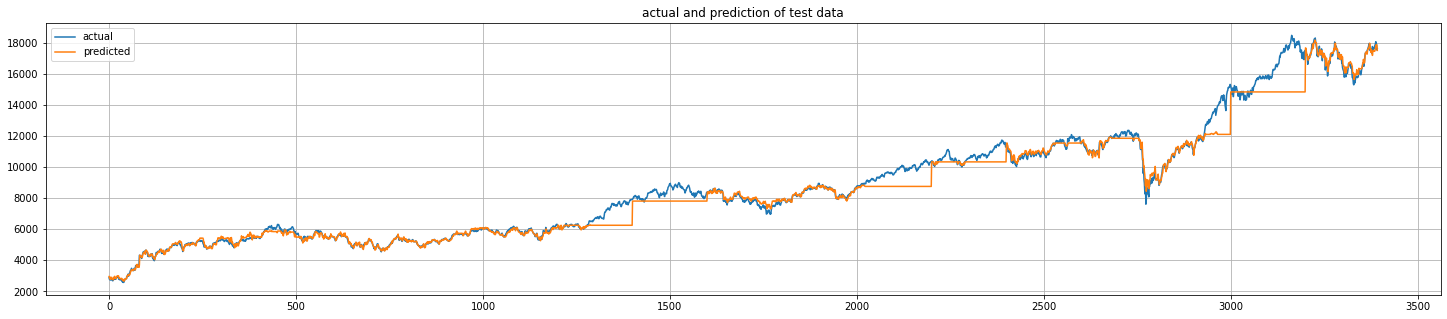

In [107]:
print('MAPE of train is ',avg_MAPE_train_lgbm)
print('MAPE of test is ',avg_MAPE_test_lgbm) 
print('MAE of train is ',avg_MAE_train_lgbm)
print('MAE of test is ',avg_MAE_test_lgbm)
print('RSME of train is ',avg_RMSE_train_lgbm)
print('RSME of test is ',avg_RMSE_test_lgbm)

plt_results(total_yt_actual, total_yt_pred_lgbm, 'actual and prediction of test data')

### Random Forest Regrerssor

In [109]:
# from the above we will select the best parameters from hyperparameter tunning
max_depth = 25
n_estimators = 100

yt_pred_rf = []
MAPE_train_rf = []
MAPE_test_rf = []
MAE_train_rf = []
MAE_test_rf = []
RMSE_train_rf = []
RMSE_test_rf = []

for i in range(0,len(train_norm_split)):
    
    rf_reg = RandomForestRegressor(n_estimators=100, max_depth=25)
    rf_reg = rf_reg.fit(train_norm_split[i],y_train_splits[i])
    
    y_train_pred = rf_reg.predict(train_norm_split[i])
    y_test_pred = rf_reg.predict(test_norm_split[i])
    
    MAPE_train = mean_absolute_percentage_error(y_train_splits[i], y_train_pred)
    MAPE_test = mean_absolute_percentage_error(y_test_splits[i], y_test_pred)
    
    MAE_train, RMSE_train = calculate_metrics(y_train_splits[i], y_train_pred)
    MAE_test, RMSE_test = calculate_metrics(y_test_splits[i], y_test_pred)
    
    yt_pred_rf.append(y_test_pred)
    MAPE_train_rf.append(MAPE_train)
    MAPE_test_rf.append(MAPE_test)
    MAE_train_rf.append(MAE_train)
    MAE_test_rf.append(MAE_test)
    RMSE_train_rf.append(RMSE_train)
    RMSE_test_rf.append(RMSE_test)
    
avg_MAPE_train_rf = sum(MAPE_train_rf)/len(MAPE_train_rf)
avg_MAPE_test_rf = sum(MAPE_test_rf)/len(MAPE_test_rf)
avg_MAE_train_rf = sum(MAE_train_rf)/len(MAE_train_rf)
avg_MAE_test_rf = sum(MAE_test_rf)/len(MAE_test_rf)
avg_RMSE_train_rf = sum(RMSE_train_rf)/len(RMSE_train_rf)
avg_RMSE_test_rf = sum(RMSE_test_rf)/len(RMSE_test_rf)

In [110]:
total_yt_pred_rf = []

for i in range(0,len(y_test_splits)):
    total_yt_pred_rf += list(yt_pred_rf[i])

MAPE of train is  0.3833802182890525
MAPE of test is  2.953902858497755
MAE of train is  23.622593764705776
MAE of test is  301.4948112686671
RSME of train is  32.85334562084115
RSME of test is  404.26334833268766


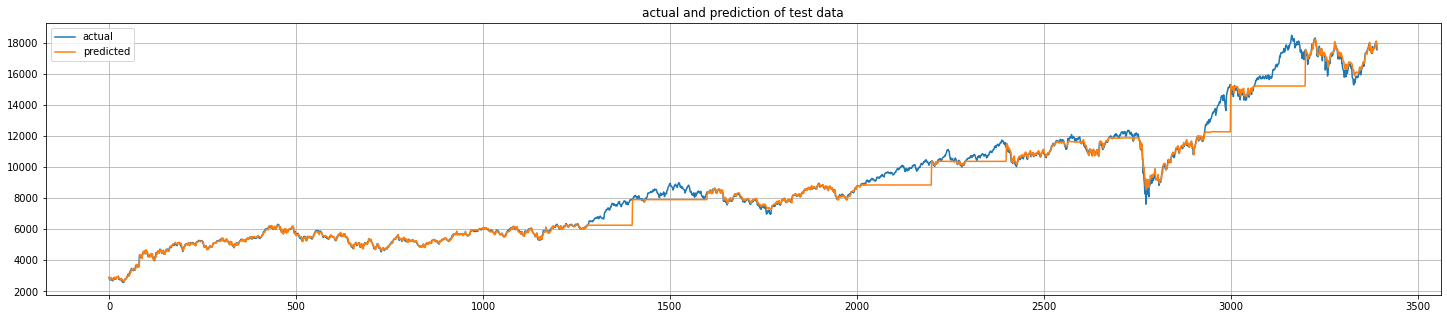

In [111]:
print('MAPE of train is ',avg_MAPE_train_rf)
print('MAPE of test is ',avg_MAPE_test_rf) 
print('MAE of train is ',avg_MAE_train_rf)
print('MAE of test is ',avg_MAE_test_rf)
print('RSME of train is ',avg_RMSE_train_rf)
print('RSME of test is ',avg_RMSE_test_rf)

plt_results(total_yt_actual, total_yt_pred_rf, 'actual and prediction of test data')

As we can see in above plot that somewhere randomforest regressor gives overfitting results. also randomforest regressor gives overfitting results in test data.

### Summary table

#### Results before splitting the data in multiple Windows

In [112]:
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

summary = PrettyTable()

summary.field_names = ["Model", "MAPE", "MAE", "RMSE"]

summary.add_row(["SVR", 12.18, 2119, 2279.77])
summary.add_row(["Xgboost", 1.734, 297, 377.92])
summary.add_row(["SGDregressor", 59.47, 10228, 10312])
summary.add_row(["LGBM", 3.12, 542.5, 642.43])
summary.add_row(["Randomforest", 1.78, 306.11, 385.8])
summary.add_row(["Cat boost", 2.57, 445, 545])

print(summary)

+--------------+-------+--------+---------+
|    Model     |  MAPE |  MAE   |   RMSE  |
+--------------+-------+--------+---------+
|     SVR      | 12.18 |  2119  | 2279.77 |
|   Xgboost    | 1.734 |  297   |  377.92 |
| SGDregressor | 59.47 | 10228  |  10312  |
|     LGBM     |  3.12 | 542.5  |  642.43 |
| Randomforest |  1.78 | 306.11 |  385.8  |
|  Cat boost   |  2.57 |  445   |   545   |
+--------------+-------+--------+---------+


#### Results after splitting the data in multiple Windows

In [113]:
summary = PrettyTable()

summary.field_names = ["Model", "MAPE", "MAE", "RMSE"]

summary.add_row(["SVR", avg_MAPE_test_svr, avg_MAE_test_svr, avg_RMSE_test_svr])
summary.add_row(["Xgboost", avg_MAPE_test_xgb, avg_MAE_test_xgb, avg_RMSE_test_xgb])
summary.add_row(["SGDregressor", avg_MAPE_test_sgd, avg_MAE_test_sgd, avg_RMSE_test_sgd])
summary.add_row(["LGBM", avg_MAPE_test_lgbm, avg_MAE_test_lgbm, avg_RMSE_test_lgbm])
summary.add_row(["Randomforest", avg_MAPE_test_rf, avg_MAE_test_rf, avg_RMSE_test_rf])

print(summary)

+--------------+--------------------+--------------------+--------------------+
|    Model     |        MAPE        |        MAE         |        RMSE        |
+--------------+--------------------+--------------------+--------------------+
|     SVR      | 3.5430792096219075 | 373.94623007425395 | 469.80163749677325 |
|   Xgboost    | 3.490860378212313  | 346.0141785454487  | 451.90605711603365 |
| SGDregressor | 0.8800313531895634 | 73.56523729522914  | 97.41556134876572  |
|     LGBM     | 3.4883711662882924 | 350.44007752485794 | 455.97890937149475 |
| Randomforest | 2.953902858497755  | 301.4948112686671  | 404.26334833268766 |
+--------------+--------------------+--------------------+--------------------+


1) As we can see that before splitting the data into multiple windows gives a high variance and also not giving satisfactory results.

2) After splitting the data into multiple train test window, We have reduced the variance.

3) We can see that after splitting the data, SGDregressor perform well in our data.

4) So, we will use SGD regressor in production.

### training sgd regressor on last window i.e. recent data 

In [7]:
# we will train a model on last data and store it in local drive.
# we will also store the min max scalar. to normalise the future data.

train_data_last = train_splits[-1]
test_data_last = test_splits[-1]
y_train_last = y_train_splits[-1]
y_test_last = y_test_splits[-1]

In [12]:
# Normalising the data.
from sklearn.preprocessing import MinMaxScaler

MinMaxscalar = MinMaxScaler()
MinMaxscalar = scalar.fit(train_data_last)
names = train_data_last.columns

In [16]:
# let's save the scalar model for Normalise the future data

import pickle

with open('MinMaxscalar.pkl', 'wb') as f:
    pickle.dump(MinMaxscalar, f)

In [9]:
import pickle

with open('MinMaxscalar.pkl', 'rb') as f:
    MinMaxscalar = pickle.load(f)

In [10]:
names = train_data_last.columns
d =  MinMaxscalar.transform(test_data_last)
scaled_test = pd.DataFrame(d, columns=names)

In [12]:
d_train = MinMaxscalar.transform(train_data_last)
scaled_train = pd.DataFrame(d_train, columns=names)

In [14]:
sgd_reg = SGDRegressor(loss='squared_epsilon_insensitive',alpha=0.0001,penalty='elasticnet',shuffle=True,
                           tol=0.000001,l1_ratio=0.15,epsilon=0.01,learning_rate='adaptive',max_iter=1000,eta0 =0.1)
sgd_reg = sgd_reg.fit(scaled_train,y_train_last)

In [15]:
y_train_pred = sgd_reg.predict(scaled_train)
y_test_pred = sgd_reg.predict(scaled_test)

In [18]:
MAPE_train = mean_absolute_percentage_error(y_train_last, y_train_pred)
MAPE_test = mean_absolute_percentage_error(y_test_last, y_test_pred)
    
MAE_train, RMSE_train = calculate_metrics(y_train_last, y_train_pred)
MAE_test, RMSE_test = calculate_metrics(y_test_last, y_test_pred)

In [25]:
with open('sgdregressor.pkl', 'wb') as f:
    pickle.dump(sgd_reg, f)

In [26]:
with open('sgdregressor.pkl', 'rb') as f:
    regressor_model = pickle.load(f)